# This demo notebook illustrates how to use the TS-RSR algorithm on a user-given objective function.

## First, import packages

In [22]:
import numpy as np
import sklearn.gaussian_process.kernels as kernels
import sys

# sys.path.append('~/desktop/research/batch_bayesian/dbo')
sys.path.append('../')


# from src.bayesian_optimization_siam import BayesianOptimizationCentralized
import src.bayesian_optimization_siam as bo
import json
import argparse

## Next provide your own objective function. As an example, we try a 2D rosenbrock function

In [76]:
class BraninToy: #check out https://github.com/ma921/SOBER/blob/2c587b7b116a00dd72c1d1f58c0b0f2c20ee0bef/tutorials/08%20Benchmarking%20against%20batch%20BO%20methods.ipynb
    def __init__(self):
        self.domain = np.array([[-2, 3], [-2, 3]])
        self.function = lambda x: -np.prod((np.sin(x) + np.cos(3*x)/2)**2/((x/2.)**2+0.3))
        self.min = -10.604333877563477
        self.arg_min = np.array([[-1.02543108, -1.02543108]])
        print("Testing argmin value: discrepncy to self.min", self.function(self.arg_min) - self.min)

function_dict = {'braninToy':BraninToy()}

Testing argmin value: discrepncy to self.min -2.79130755842516e-07


In [80]:
from importlib import reload
reload(bo)

<module 'src.bayesian_optimization_siam' from '/Users/zhr568/Desktop/research/batch_bayesian/dbo/examples/../src/bayesian_optimization_siam.py'>

## Specify a number of parameters

In [87]:
class Args(argparse.Namespace):
  objective = 'braninToy'
  model= 'torch'
  n_workers = 20
  kernel = 'Matern'
  acquisition_function = "ts_rsr"
  # unconstrained = True
  grid_density = 30
  n_iters = 5
  n_runs = 1
  random_search = 1000
  n_ysamples = 1
  seed = 0

args=Args()

In [88]:
kernel_dict = {'RBF':kernels.RBF(), 'Matern':kernels.Matern()}
arg_max = function_dict.get(args.objective).arg_min 
network = np.ones([args.n_workers,args.n_workers])

batchBO = bo.BatchBayesianOptimization(objective=function_dict.get(args.objective),
                               domain=function_dict.get(args.objective).domain,
                               arg_max=arg_max,
                               n_workers=args.n_workers,
                               network=network,
                               kernel=kernel_dict.get(args.kernel),
                               acquisition_function=args.acquisition_function,
                               grid_density=args.grid_density,
                               n_ysamples = args.n_ysamples,
                               args=args)

done with initialization


## Next define a Bayesian Optimization object

Algorithm:ts_rsr
seed is 0
GP INITIAL NOISE tensor([1.0000e-06])
objective name braninToy


100%|██████████| 6/6 [09:23<00:00, 93.93s/it] 


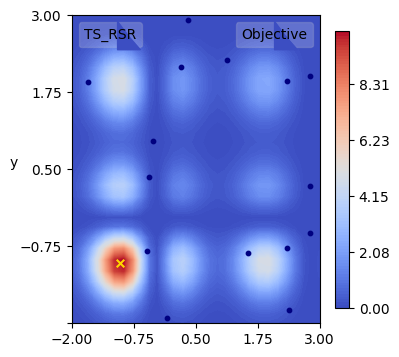

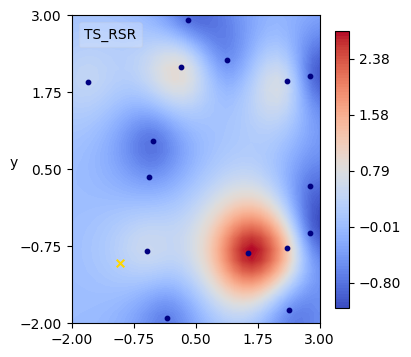

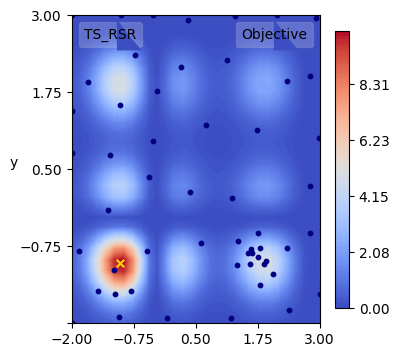

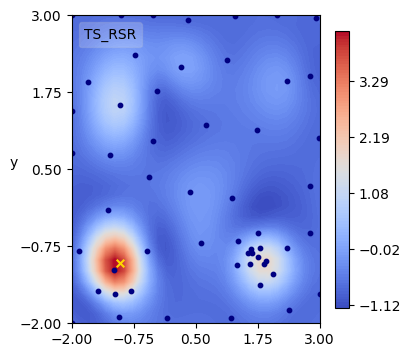

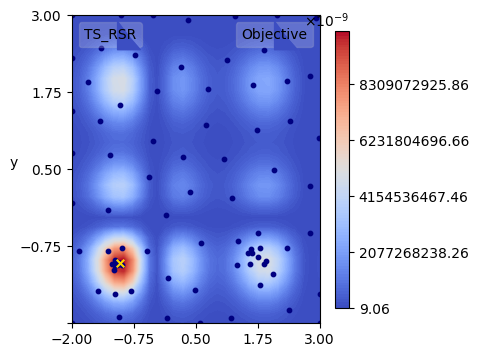

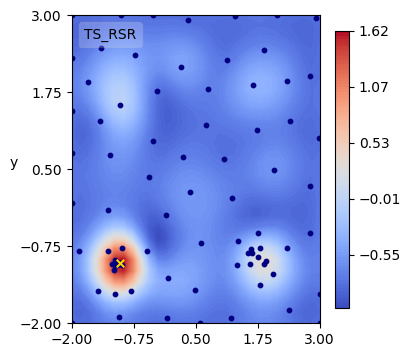

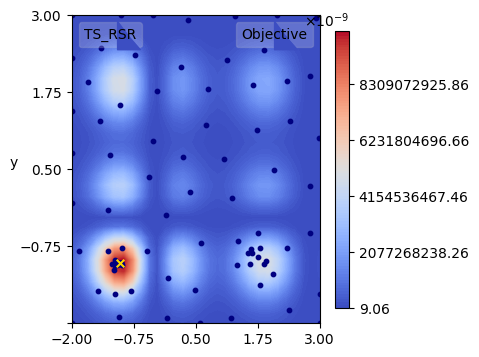

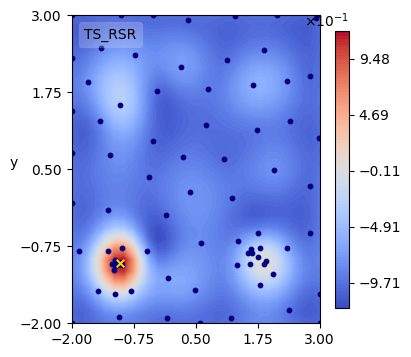

In [89]:
batchBO.optimize(n_iters = args.n_iters, n_runs = args.n_runs, n_pre_samples = 15, random_search = args.random_search, plot = True, plot_freq = 2)

## Compare to TS for a comparison

In [90]:
class Args(argparse.Namespace):
  objective = 'braninToy'
  model= 'torch'
  n_workers = 20
  kernel = 'Matern'
  acquisition_function = "ts"
  # unconstrained = True
  grid_density = 30
  n_iters = 5
  n_runs = 1
  random_search = 1000
  n_ysamples = 1
  seed = 0

args_ts=Args()

In [91]:
kernel_dict = {'RBF':kernels.RBF(), 'Matern':kernels.Matern()}
arg_max = function_dict.get(args_ts.objective).arg_min 
network = np.ones([args_ts.n_workers,args.n_workers])

batchBO_ts = bo.BatchBayesianOptimization(objective=function_dict.get(args_ts.objective),
                               domain=function_dict.get(args_ts.objective).domain,
                               arg_max=arg_max,
                               n_workers=args_ts.n_workers,
                               network=network,
                               kernel=kernel_dict.get(args_ts.kernel),
                               acquisition_function=args_ts.acquisition_function,
                               grid_density=args_ts.grid_density,
                               n_ysamples = args_ts.n_ysamples,
                               args=args_ts)

done with initialization


Algorithm:ts
seed is 0
GP INITIAL NOISE tensor([1.0000e-06])
objective name braninToy


100%|██████████| 6/6 [00:25<00:00,  4.22s/it]


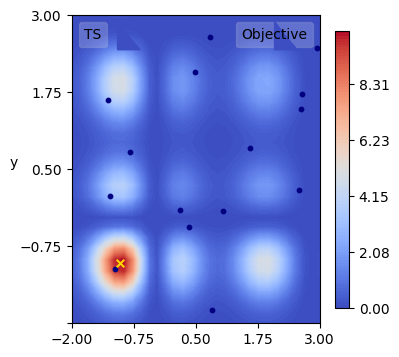

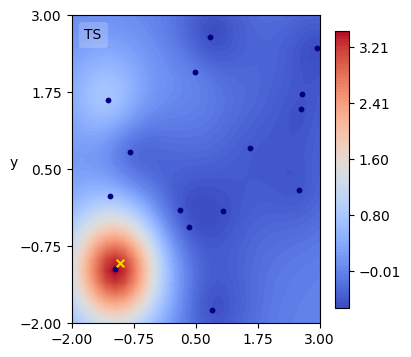

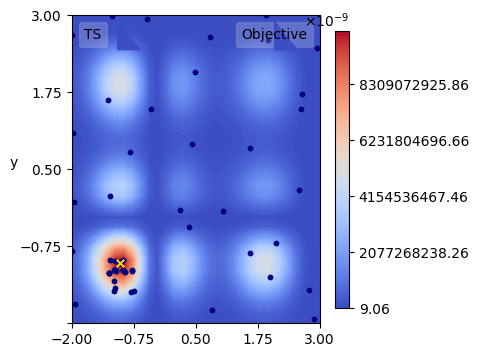

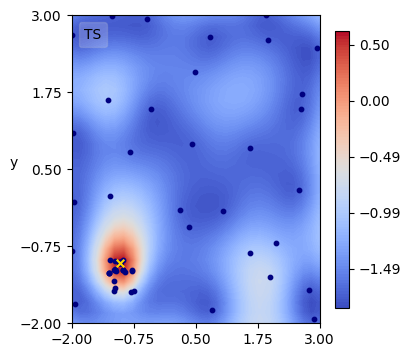

In [92]:
batchBO_ts.optimize(n_iters = args.n_iters, n_runs = args.n_runs, n_pre_samples = 15, random_search = args.random_search, plot = True, plot_freq = 30)